Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Regression

Importing the dataset

In [2]:
Car_Price = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
Car_Price.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

Getting an understanding of the dataset

In [4]:
Car_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Finding the numerical features and numerical features

In [5]:
num_features = Car_Price.select_dtypes(include=[np.number])

num_features.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
cat_features = Car_Price.select_dtypes(include=[np.object])

cat_features.columns

C:\Users\haysh\AppData\Local\Temp\ipykernel_32188\3221187029.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_features = Car_Price.select_dtypes(include=[np.object])


Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

Checking for Null Values

In [7]:
Car_Price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Removing irrelavant data from the dataset

In [8]:
Car_Price.drop('car_ID',axis=1,inplace=True)
Car_Price.drop(columns=['CarName'], inplace=True)

In [9]:
Car_Price.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  enginesize  fuelsystem  \
0          front       88.6      168.8      64.1  ...         130        mpfi   
1          front       88.6      168.8      64.1  ...         130        mpfi   
2          front       94.5      171.2      65.5  ...         152        mpfi   
3          front       99.8      176.6      66.2  ...         109        mpfi   
4          front       99.4      176.6      66.4  ...         136        mpfi   

  boreratio stroke  compressionratio horsepower  peakrpm  citympg  highwaympg  \
0      3.47   2.68               9.0        111     5000       21          27   
1      3.47   2.68               9.0        111     5000       21          27   
2      2.68   3.47               9.0        154     5000       19          26   
3      3.19   3.40              10.0        102     5500       24          30   
4      3.19   3.40               8.0        115     5500       18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 24 columns]

Exploratory Data Analysis

gas       185
diesel     20
Name: fueltype, dtype: int64


<AxesSubplot:xlabel='fueltype', ylabel='price'>

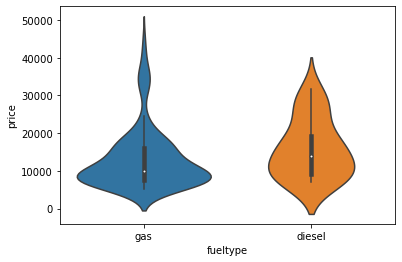

In [10]:
print(Car_Price['fueltype'].value_counts())
sns.violinplot(x=Car_Price['fueltype'],y= Car_Price['price'], data=Car_Price)

In [11]:
Car_Price.replace({'fueltype':{'diesel':0, 'gas':1}}, inplace=True)

std      168
turbo     37
Name: aspiration, dtype: int64


<AxesSubplot:xlabel='aspiration', ylabel='price'>

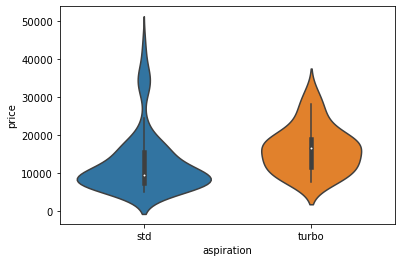

In [12]:
print(Car_Price['aspiration'].value_counts())
sns.violinplot(x=Car_Price['aspiration'],y= Car_Price['price'], data=Car_Price)

In [13]:
Car_Price.replace({'aspiration':{'Zero':0, 'One':1}}, inplace=True)

four    115
two      90
Name: doornumber, dtype: int64


<AxesSubplot:xlabel='doornumber', ylabel='price'>

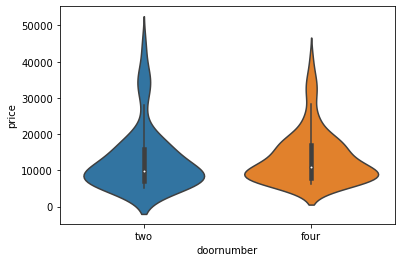

In [14]:
print(Car_Price['doornumber'].value_counts())
sns.violinplot(x=Car_Price['doornumber'],y= Car_Price['price'], data=Car_Price)

In [15]:
Car_Price.replace({'doornumber':{'two':0, 'four':1}}, inplace=True)

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


<AxesSubplot:xlabel='carbody', ylabel='price'>

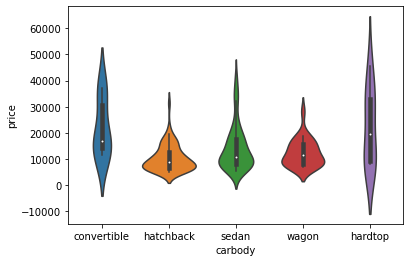

In [16]:
print(Car_Price['carbody'].value_counts())
sns.violinplot(x=Car_Price['carbody'],y= Car_Price['price'], data=Car_Price)

In [17]:
Car_Price.replace({'carbody':{'sedan':0, 'hatchback':1, 'wagon':2,'hardtop':3,'convertible':4}}, inplace=True)

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


<AxesSubplot:xlabel='drivewheel', ylabel='price'>

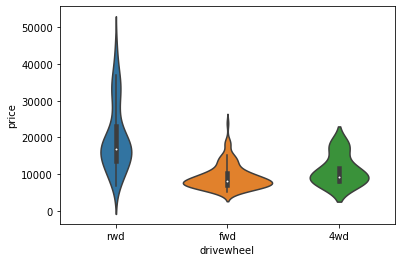

In [18]:
print(Car_Price['drivewheel'].value_counts())
sns.violinplot(x=Car_Price['drivewheel'],y= Car_Price['price'], data=Car_Price)

In [19]:
Car_Price.replace({'drivewheel':{'rwd':0, 'fwd':1, '4wd':2}}, inplace=True)

front    202
rear       3
Name: enginelocation, dtype: int64


<AxesSubplot:xlabel='enginelocation', ylabel='price'>

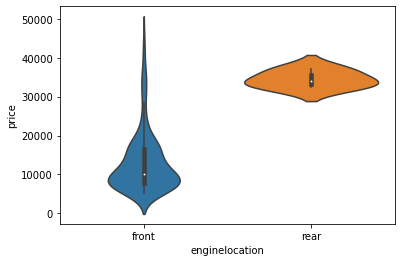

In [20]:
print(Car_Price['enginelocation'].value_counts())
sns.violinplot(x=Car_Price['enginelocation'],y= Car_Price['price'], data=Car_Price)


In [21]:
Car_Price.replace({'enginelocation':{'front':0, 'rear':1}}, inplace=True)

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


<AxesSubplot:xlabel='enginetype', ylabel='price'>

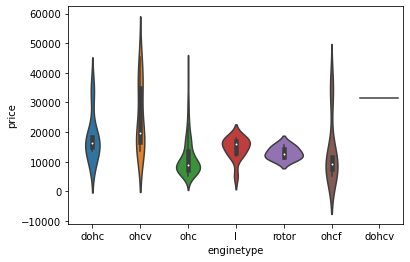

In [22]:
print(Car_Price['enginetype'].value_counts())
sns.violinplot(x=Car_Price['enginetype'],y= Car_Price['price'], data=Car_Price)

In [23]:
Car_Price.replace({'enginetype':{'dohc':0, 'ohcv':1, 'ohc':2,'I':3, 'rotor':4, 'ohcf':5,'dohcv':6}}, inplace=True)

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

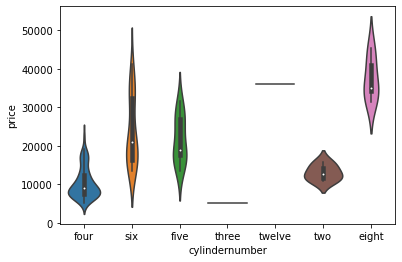

In [24]:
print(Car_Price['cylindernumber'].value_counts())
sns.violinplot(x=Car_Price['cylindernumber'],y= Car_Price['price'], data=Car_Price)

In [25]:
Car_Price.replace({'cylindernumber':{'four':0, 'six':1, 'five':2,'three':3, 'twelve':4, 'two':5,'eight':6}}, inplace=True)

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

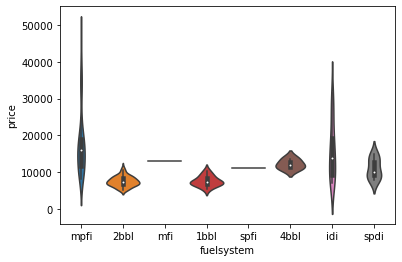

In [26]:
print(Car_Price['fuelsystem'].value_counts())
sns.violinplot(x=Car_Price['fuelsystem'],y= Car_Price['price'], data=Car_Price)

In [27]:
Car_Price.dropna(inplace=True)

C:\Users\haysh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Normal'}, xlabel='price'>

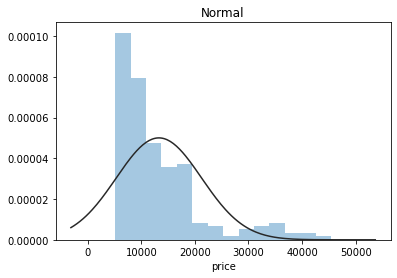

In [28]:
y = Car_Price['price']
plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

C:\Users\haysh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\haysh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\haysh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

ValueError: num must be 1 <= num <= 16, not 17

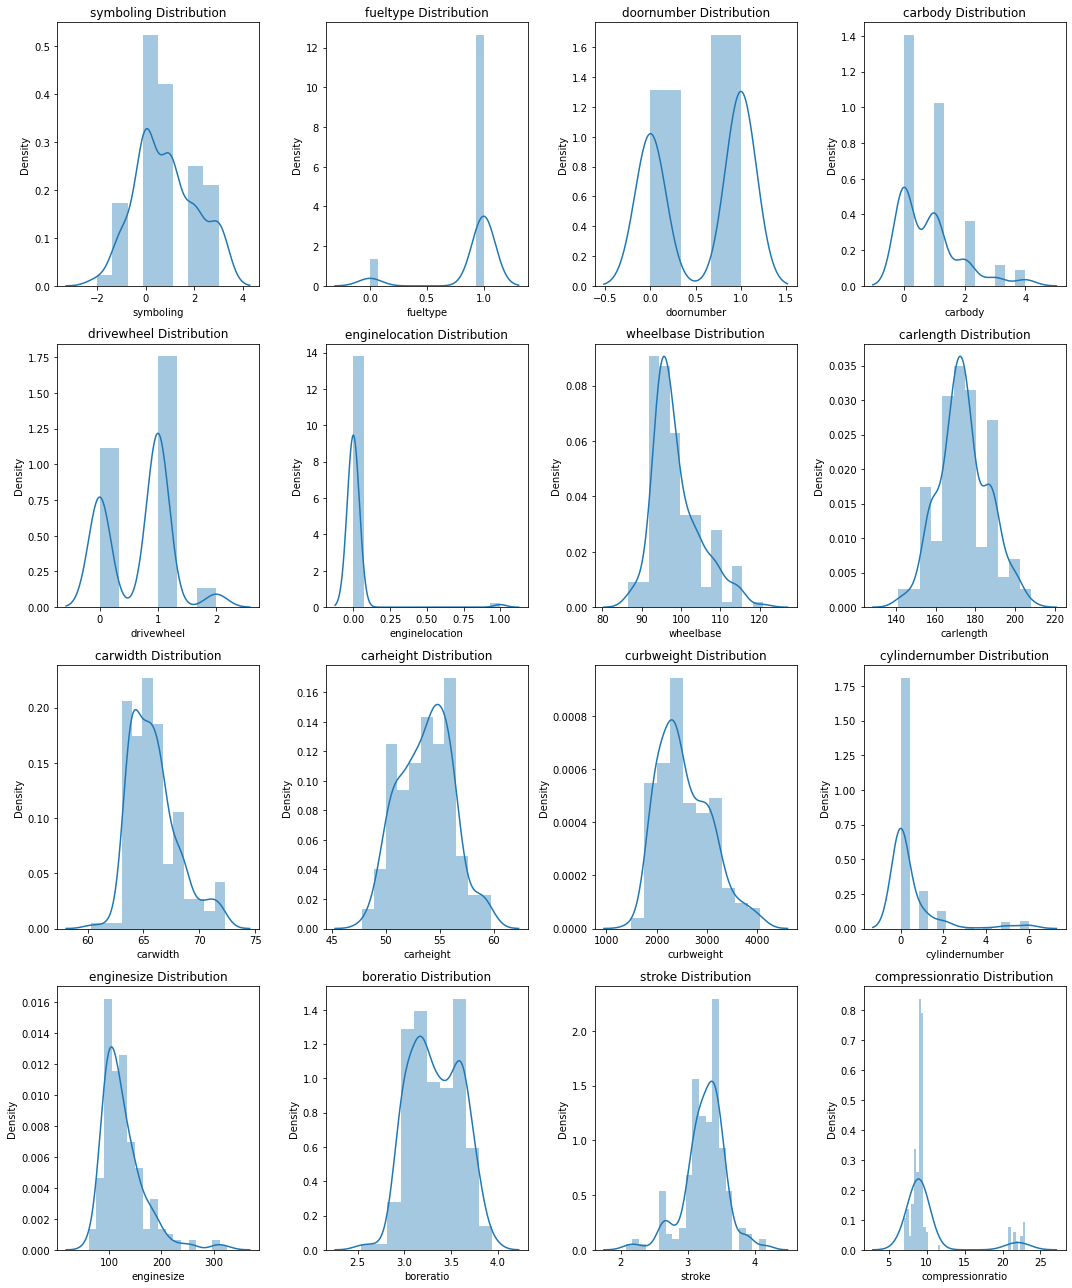

In [29]:
plt.figure(figsize=(15,18))
for i, j in enumerate(Car_Price.describe().columns):
    plt.subplot(4,4, i+1)
    sns.distplot(x=Car_Price[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()

In [30]:
from matplotlib import pyplot
import seaborn

<AxesSubplot:ylabel='citympg'>

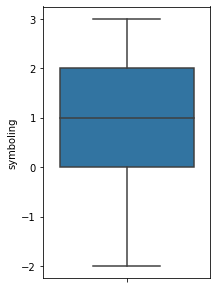

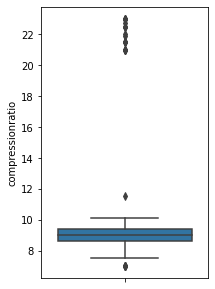

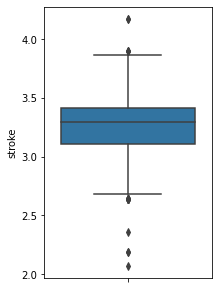

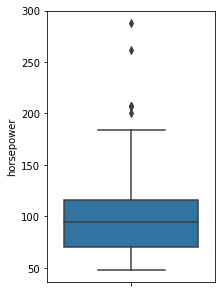

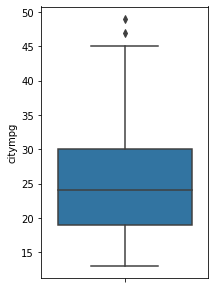

In [31]:
fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Car_Price["symboling"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Car_Price["compressionratio"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Car_Price["stroke"] )  

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Car_Price["horsepower"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Car_Price["citympg"] )

Detecting outliers and removing them

In [43]:
from collections import Counter
def IQR_method (df,n,features):
    

    
    outlier_list = []
    
    for column in features:
                
        
        Q1 = np.percentile(num_features[column], 25)
       
        Q3 = np.percentile(num_features[column],75)
        
      
        IQR1 = Q3 - Q1
        
        outlierst1 = 1.5 * IQR1
        
        # Determining a list of indices of outliers
        outlier_list_column = num_features[(num_features[column] < Q1 - outlierst1) | (num_features[column] > Q3 + outlierst1 )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
   
    
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    d1 = num_features[num_features[column] < Q1 - outlierst1]
    d2 = num_features[num_features[column] > Q3 + outlierst1]
    
    print('Total number of outliers is:', d1.shape[0]+d2.shape[0])
    
    return multiple_outliers

# detecting outliers
Outliers_IQR = IQR_method(num_features,1,num_features.columns)

# dropping outliers
df_out = num_features.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of outliers is: 15


Plotting the correlation matrix

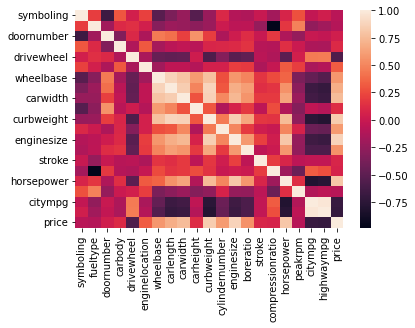

In [44]:
correlation_matrix= sns.heatmap(Car_Price.corr())

In [45]:
correlation = num_features.corr()

Index(['price', 'enginesize', 'curbweight', 'horsepower', 'carwidth',
       'carlength', 'wheelbase', 'boreratio', 'carheight', 'stroke',
       'compressionratio'],
      dtype='object')


<AxesSubplot:>

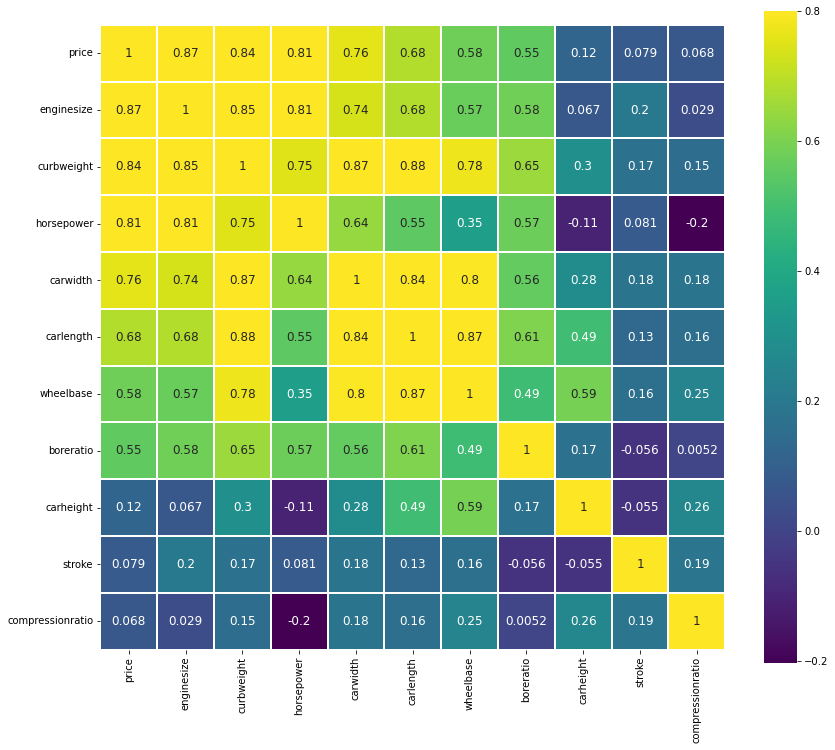

In [46]:
k= 11
cols = correlation.nlargest(k,'price')['price'].index
print(cols)
cm = np.corrcoef(Car_Price[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [47]:
corr_matrix = Car_Price.corr().abs()

Removing the variables that have a correlation value greater than 0.85

In [50]:
uppr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in uppr.columns if any(uppr[column] > 0.85)]
print(); print(to_drop)


['carlength', 'curbweight', 'enginesize', 'compressionratio', 'highwaympg', 'price']


C:\Users\haysh\AppData\Local\Temp\ipykernel_32188\3775037233.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  uppr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [39]:
Car_Price.drop('carlength',axis=1,inplace=True)
Car_Price.drop('curbweight',axis=1,inplace=True)
Car_Price.drop('enginesize',axis=1,inplace=True)
Car_Price.drop('highwaympg',axis=1,inplace=True)

In [40]:
Car_Price.drop(columns=['enginetype'], inplace=True)

Converting the categorical variables into numerical(dummy) variables

In [41]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
Car_Price['fueltype'] = encoder.fit_transform(Car_Price['fueltype'].to_numpy().reshape(-1,1))

In [42]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
Car_Price['aspiration'] = encoder.fit_transform(Car_Price['aspiration'].to_numpy().reshape(-1,1))

In [43]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
Car_Price['doornumber'] = encoder.fit_transform(Car_Price['doornumber'].to_numpy().reshape(-1,1))

In [44]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
Car_Price['carbody'] = encoder.fit_transform(Car_Price['carbody'].to_numpy().reshape(-1,1))

In [45]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
Car_Price['drivewheel'] = encoder.fit_transform(Car_Price['drivewheel'].to_numpy().reshape(-1,1))

In [46]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
Car_Price['enginelocation'] = encoder.fit_transform(Car_Price['enginelocation'].to_numpy().reshape(-1,1))

In [47]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
Car_Price['cylindernumber'] = encoder.fit_transform(Car_Price['cylindernumber'].to_numpy().reshape(-1,1))


In [48]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
Car_Price['fueltype'] = encoder.fit_transform(Car_Price['fueltype'].to_numpy().reshape(-1,1))

In [49]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
Car_Price['fuelsystem'] = encoder.fit_transform(Car_Price['fuelsystem'].to_numpy().reshape(-1,1))

In [50]:
Car_Price.drop('aspiration',inplace=True,axis=1)

In [51]:
Car_Price

symboling  fueltype  doornumber  carbody  drivewheel  enginelocation  \
0            3       1.0         0.0      4.0         0.0             0.0   
1            3       1.0         0.0      4.0         0.0             0.0   
2            1       1.0         0.0      1.0         0.0             0.0   
3            2       1.0         1.0      0.0         1.0             0.0   
4            2       1.0         1.0      0.0         2.0             0.0   
..         ...       ...         ...      ...         ...             ...   
200         -1       1.0         1.0      0.0         0.0             0.0   
201         -1       1.0         1.0      0.0         0.0             0.0   
202         -1       1.0         1.0      0.0         0.0             0.0   
203         -1       0.0         1.0      0.0         0.0             0.0   
204         -1       1.0         1.0      0.0         0.0             0.0   

     wheelbase  carwidth  carheight  cylindernumber  fuelsystem  boreratio  \
0         88.6      64.1       48.8             0.0         5.0       3.47   
1         88.6      64.1       48.8             0.0         5.0       3.47   
2         94.5      65.5       52.4             1.0         5.0       2.68   
3         99.8      66.2       54.3             0.0         5.0       3.19   
4         99.4      66.4       54.3             2.0         5.0       3.19   
..         ...       ...        ...             ...         ...        ...   
200      109.1      68.9       55.5             0.0         5.0       3.78   
201      109.1      68.8       55.5             0.0         5.0       3.78   
202      109.1      68.9       55.5             1.0         5.0       3.58   
203      109.1      68.9       55.5             1.0         3.0       3.01   
204      109.1      68.9       55.5             0.0         5.0       3.78   

     stroke  compressionratio  horsepower  peakrpm  citympg    price  
0      2.68               9.0         111     5000       21  13495.0  
1      2.68               9.0         111     5000       21  16500.0  
2      3.47               9.0         154     5000       19  16500.0  
3      3.40              10.0         102     5500       24  13950.0  
4      3.40               8.0         115     5500       18  17450.0  
..      ...               ...         ...      ...      ...      ...  
200    3.15               9.5         114     5400       23  16845.0  
201    3.15               8.7         160     5300       19  19045.0  
202    2.87               8.8         134     5500       18  21485.0  
203    3.40              23.0         106     4800       26  22470.0  
204    3.15               9.5         114     5400       19  22625.0  

[205 rows x 18 columns]

In [52]:
Car_Price.columns

Index(['symboling', 'fueltype', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carwidth', 'carheight',
       'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price'],
      dtype='object')

Defining independent variables and dependent variables of the dataset

In [53]:
X = Car_Price.iloc[:,:-1,]
y = Car_Price.iloc[:,-1]

In [54]:
X.shape
y.shape

(205,)

In [55]:
Car_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    float64
 2   doornumber        205 non-null    float64
 3   carbody           205 non-null    float64
 4   drivewheel        205 non-null    float64
 5   enginelocation    205 non-null    float64
 6   wheelbase         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   cylindernumber    205 non-null    float64
 10  fuelsystem        205 non-null    float64
 11  boreratio         205 non-null    float64
 12  stroke            205 non-null    float64
 13  compressionratio  205 non-null    float64
 14  horsepower        205 non-null    int64  
 15  peakrpm           205 non-null    int64  
 16  citympg           205 non-null    int64  
 1

Splitting into train set and test set

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54545)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train_scaled = std_scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Linear Regression

In [58]:
model = linear_model.LinearRegression()

Fitting the model

In [59]:
model.fit(X_train, y_train)

LinearRegression()

Finding the model coefficients

In [60]:
model.coef_

array([ -122.62555921, -1937.33367188,   -74.03992228,  -133.56337925,
        -847.95461031,  2105.55770817,  1171.00631141,  1703.5980424 ,
         304.39109899,  1442.52469211,  -133.64066301,  -483.11510247,
        -192.20097684, -1511.26268962,  3545.55766718,  -573.71362694,
        -389.9061293 ])

Finding the model intercept value

In [62]:
model.intercept_

13544.170731707309

modelA = Rf
evaluation(Rf)

In [63]:
y_pred = model.predict(X_test)

In [64]:
from sklearn import datasets, metrics, linear_model

Calculating R squared value

In [65]:
r2 = metrics.r2_score(y_test, y_pred)


Calculating the RMSE

In [66]:
def evaluation(model):
    modelA.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R squared: ", round(r2,3))
    print("RMSE: {}".format(np.sqrt(metrics.mean_absolute_error(y_test, y_pred))))#lower the better

In [67]:
X_train

array([[ 0.05843725,  0.31728716, -1.06295349, ..., -0.92666185,
        -0.32354493,  0.98140514],
       [ 0.05843725,  0.31728716, -1.06295349, ..., -0.14756518,
         0.73556422,  0.0195499 ],
       [-0.74020512,  0.31728716, -1.06295349, ...,  0.363717  ,
        -1.91220866, -0.62168692],
       ...,
       [-1.53884749,  0.31728716,  0.94077493, ...,  0.24198315,
         0.73556422, -0.30106851],
       [ 0.05843725, -3.15171911, -1.06295349, ..., -1.24316987,
        -0.74718859,  3.22573402],
       [-0.74020512, -3.15171911,  0.94077493, ..., -0.82927477,
        -2.01811957,  0.98140514]])

In [68]:
y_train

51      6095.0
42     10345.0
12     20970.0
136    18150.0
110    13860.0
        ...   
149    11694.0
161     8358.0
88      9279.0
90      7099.0
66     18344.0
Name: price, Length: 164, dtype: float64

C:\Users\haysh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

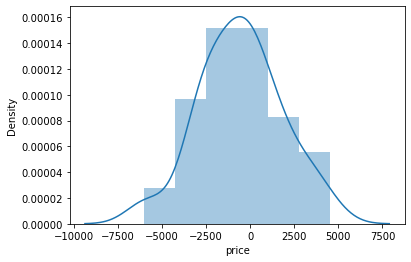

In [69]:
sns.distplot(y_test - y_pred,bins=6)
#Histogram of the residuals to sure it looks normally distributed

In [70]:
from sklearn import metrics

Finding Coefficient values of the model

In [71]:
coeffecients = pd.DataFrame(model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
symboling         -122.625559
fueltype         -1937.333672
doornumber         -74.039922
carbody           -133.563379
drivewheel        -847.954610
enginelocation    2105.557708
wheelbase         1171.006311
carwidth          1703.598042
carheight          304.391099
cylindernumber    1442.524692
fuelsystem        -133.640663
boreratio         -483.115102
stroke            -192.200977
compressionratio -1511.262690
horsepower        3545.557667
peakrpm           -573.713627
citympg           -389.906129

In [72]:
modelA = model
evaluation(model)

R squared:  0.885
RMSE: 43.199423565899984


## Decision Tree Regressor

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=50)

In [75]:
X_test.shape

(41, 17)

In [76]:
y_test.shape

(41,)

In [77]:
dtm.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [78]:
dtm.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=50)

In [79]:
modelA = dtm
evaluation(dtm)

R squared:  0.885
RMSE: 50.7594243836053


## Random Forrest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(X_train,y_train)
Rf_train_pred = Rf.predict(X_train)
Rf_test_pred = Rf.predict(X_test)


C:\Users\haysh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [81]:
modelA = Rf
evaluation(Rf)

R squared:  0.885
RMSE: 37.78932614303357


C:\Users\haysh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


## Clustering

Importing libraries and the dataset

In [85]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [86]:
Wine = pd.read_csv('wine-clustering.csv')

Understanding the dataset

In [87]:
Wine.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [88]:
Wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [89]:
Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Dropping Null Values

In [90]:
Wine.dropna(inplace=True)

In [91]:
len(Wine.describe().columns)

13

Exploratory Data Analysis

C:\Users\haysh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\haysh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\haysh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

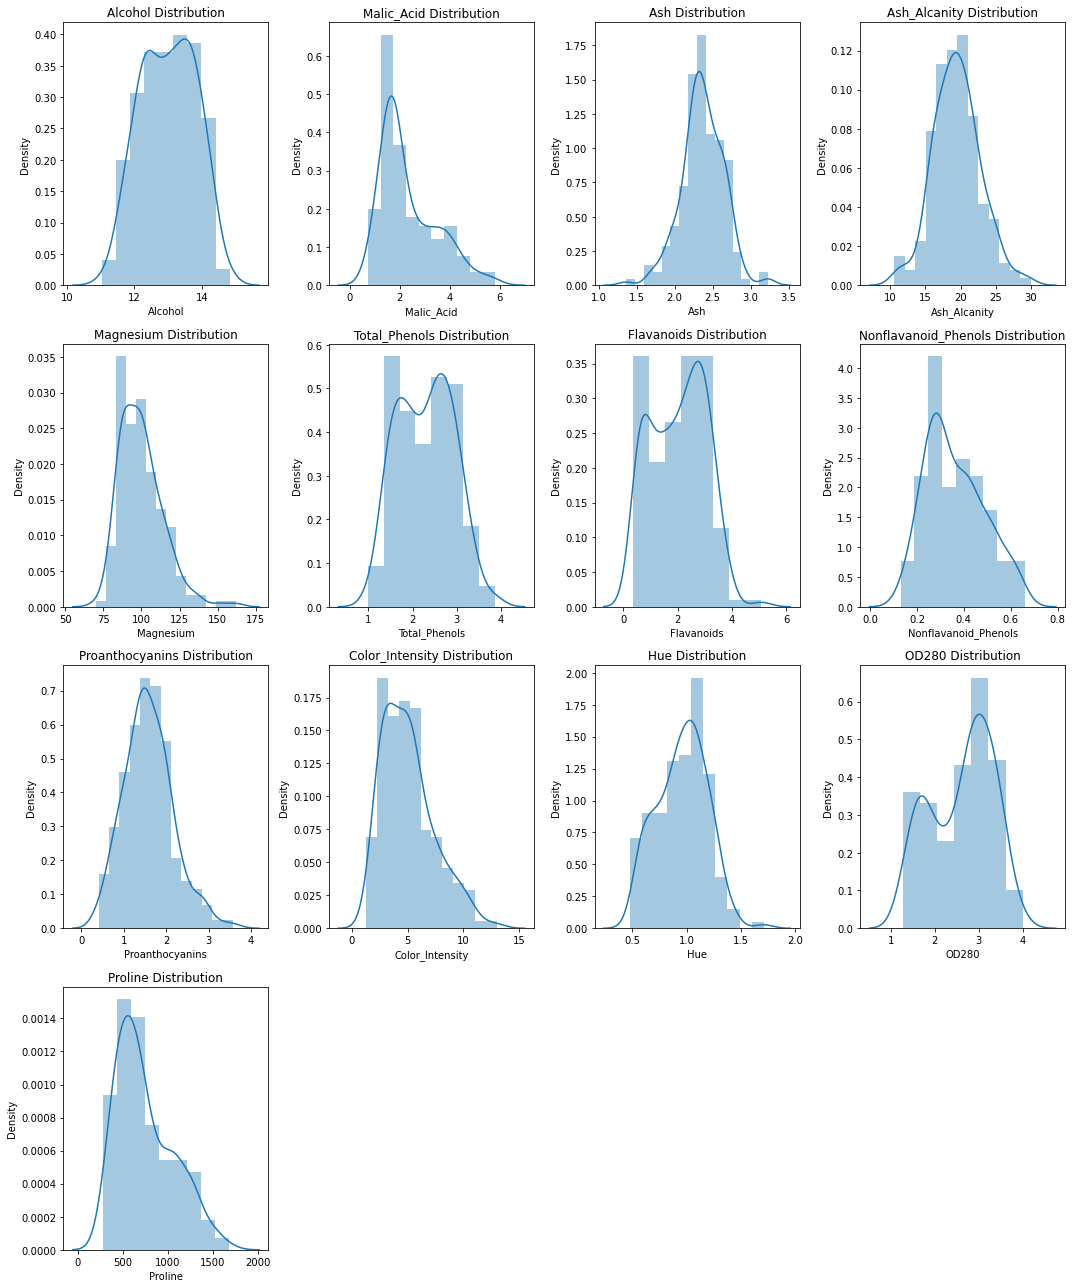

In [92]:
plt.figure(figsize=(15,18))
for i, j in enumerate(Wine.describe().columns):
    plt.subplot(4,4, i+1)
    sns.distplot(x=Wine[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
    
plt.show()

In [93]:
from matplotlib import pyplot
import seaborn

<AxesSubplot:ylabel='Proline'>

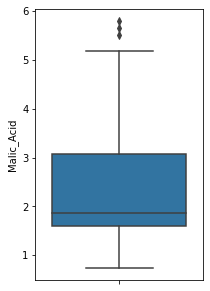

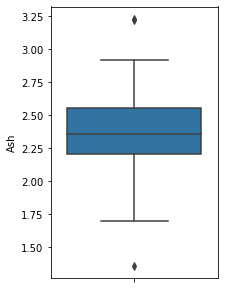

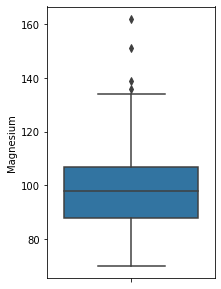

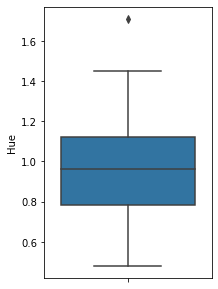

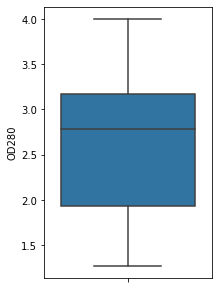

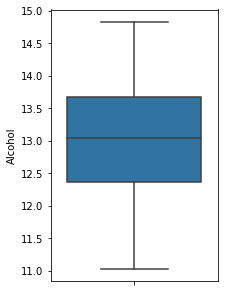

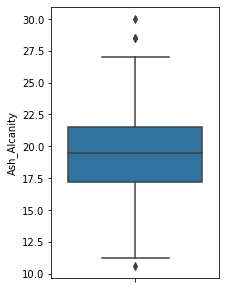

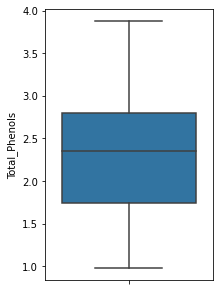

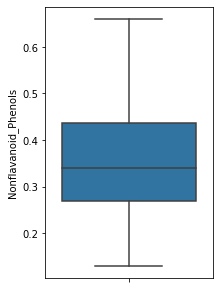

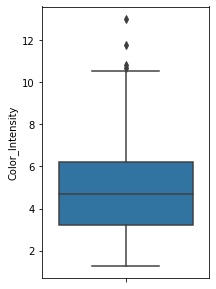

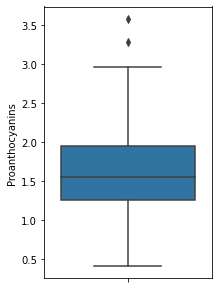

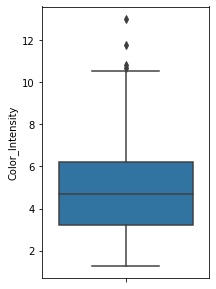

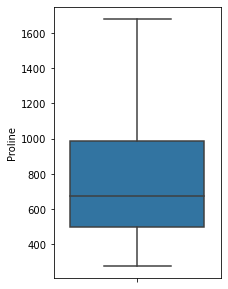

In [94]:
fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Wine["Malic_Acid"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Wine["Ash"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Wine["Magnesium"] )  

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Wine["Hue"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Wine["OD280"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Wine["Alcohol"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Wine["Ash_Alcanity"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Wine["Total_Phenols"] )  

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Wine["Nonflavanoid_Phenols"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Wine["Color_Intensity"] )  

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Wine["Proanthocyanins"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Wine["Color_Intensity"] )

fig, ax = pyplot.subplots(figsize =(3, 5))
sns.boxplot( ax = ax, y = Wine["Proline"] )

In [95]:
from collections import Counter

In [96]:
def IQR_method (df,n,features):
    
    #Takes a dataframe and returns an index list corresponding to the observations 
    #containing more than n outliers according to the Tukey IQR method.
    #
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(Wine[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(Wine[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
         # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = Wine[(Wine[column] < Q1 - outlier_step) | (Wine[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = Wine[Wine[column] < Q1 - outlier_step]
    df2 = Wine[Wine[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

# detecting outliers
Outliers_IQR = IQR_method(Wine,1,Wine.columns)

# dropping outliers
df_out = Wine.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of outliers is: 0


In [97]:
# detecting outliers
Outliers_IQR = IQR_method(Wine,1,Wine.columns)

# dropping outliers
df_out = Wine.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of outliers is: 0


Plotting the correlation coefficient matrix

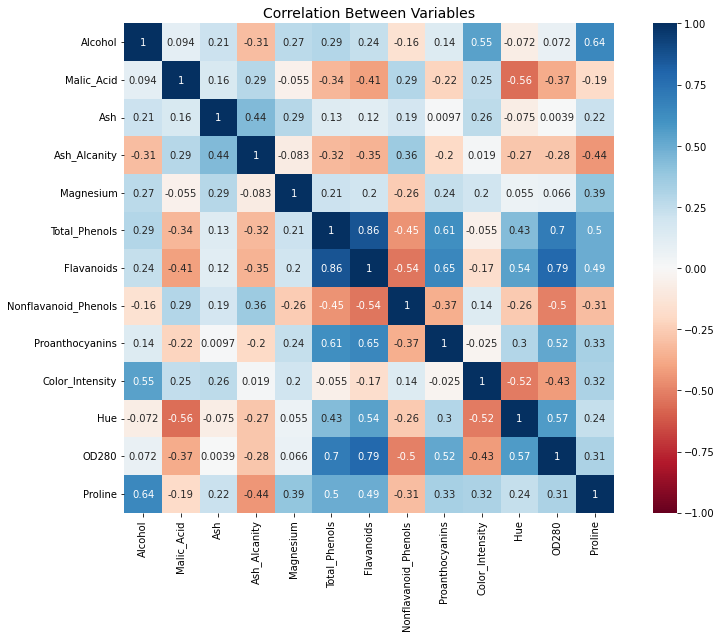

In [98]:
correlation_metrics= Wine.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

In [99]:
cor_matrix = Wine.corr().abs()
print(cor_matrix)  

                       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545      0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500   0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity          0.310235    0.288500  0.443367      1.000000   0.083333   
Magnesium             0.270798    0.054575  0.286587      0.083333   1.000000   
Total_Phenols         0.289101    0.335167  0.128980      0.321113   0.214401   
Flavanoids            0.236815    0.411007  0.115077      0.351370   0.195784   
Nonflavanoid_Phenols  0.155929    0.292977  0.186230      0.361922   0.256294   
Proanthocyanins       0.136698    0.220746  0.009652      0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                   0.071747    0.561296  0.074667      0.273955   0.055398   
OD280                 0.0723

In [100]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(); print(to_drop)



['Flavanoids']


C:\Users\haysh\AppData\Local\Temp\ipykernel_16012\1244125084.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


Removing correlated variables

In [101]:
Wine.drop(columns=["Flavanoids"], inplace=True)
Wine

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  OD280  \
0                    0.28             2.29             5.64  1.04   3.92   
1                    0.26             1.28             4.38  1.05   3.40   
2                    0.30             2.81             5.68  1.03   3.17   
3                    0.24             2.18             7.80  0.86   3.45   
4                    0.39             1.82             4.32  1.04   2.93   
..                    ...              ...              ...   ...    ...   
173                  0.52             1.06             7.70  0.64   1.74   
174                  0.43             1.41             7.30  0.70   1.56   
175                  0.43             1.35            10.20  0.59   1.56   
176                  0.53             1.46             9.30  0.60   1.62   
177                  0.56             1.35             9.20  0.61   1.60   

     Proline  
0       1065  
1       1050  
2       1185  
3       1480  
4        735  
..       ...  
173      740  
174      750  
175      835  
176      840  
177      560  

[178 rows x 12 columns]

In [102]:
#Data Standardization
std_scaler= StandardScaler()
std_scaler.fit(Wine)
data_scaled=std_scaler.transform(Wine)

Principal Component Analysis

In [103]:
pca = PCA(n_components =7)
pca_fit= pca.fit(data_scaled)

In [104]:
pca_fit

PCA(n_components=7)

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [106]:
print(pca.explained_variance_ratio_)

[0.32528185 0.20807784 0.11740471 0.07492283 0.06972545 0.05344876
 0.04573435]


In [108]:
scores_pca = pca.transform(data_scaled)

Plotting the scree plot and the cumulative graph

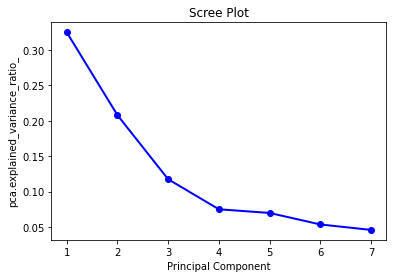

In [109]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('pca.explained_variance_ratio_')
plt.show()

<Figure size 720x576 with 0 Axes>

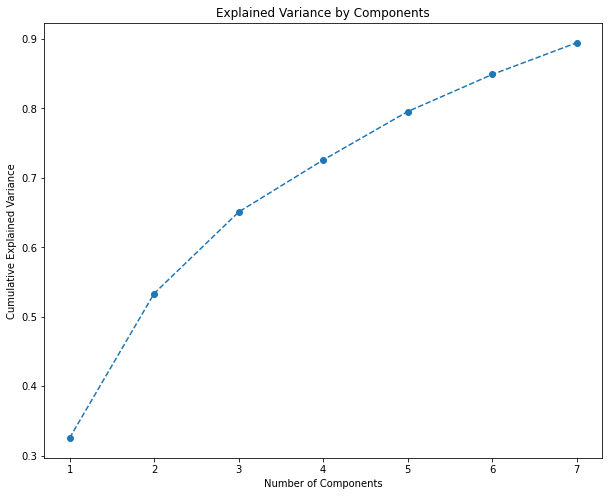

<Figure size 720x576 with 0 Axes>

In [110]:
##Cumulative graph
plt.figure(figsize=(10,8))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
         
plt.figure(figsize=(10,8))

In [111]:
#Fitt K means using the transformed data from the PCA
wcss = []
for i in range (1,21) :
    kmeans_pca = KMeans(n_clusters = i, init ='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)


C:\Users\haysh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [112]:
#that scikit-learn chooses the minimum number of principal components such that 95 percent of the variance is reta
pca = PCA(.90)

In [113]:
pca.fit(Wine)

PCA(n_components=0.9)

In [114]:
Wine

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  OD280  \
0                    0.28             2.29             5.64  1.04   3.92   
1                    0.26             1.28             4.38  1.05   3.40   
2                    0.30             2.81             5.68  1.03   3.17   
3                    0.24             2.18             7.80  0.86   3.45   
4                    0.39             1.82             4.32  1.04   2.93   
..                    ...              ...              ...   ...    ...   
173                  0.52             1.06             7.70  0.64   1.74   
174                  0.43             1.41             7.30  0.70   1.56   
175                  0.43             1.35            10.20  0.59   1.56   
176                  0.53             1.46             9.30  0.60   1.62   
177                  0.56             1.35             9.20  0.61   1.60   

     Proline  
0       1065  
1       1050  
2       1185  
3       1480  
4        735  
..       ...  
173      740  
174      750  
175      835  
176      840  
177      560  

[178 rows x 12 columns]

In [115]:
#Run local implementation of kmeans
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [116]:
#To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}

In [117]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Wine)
    sse.append(kmeans.inertia_)

C:\Users\haysh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


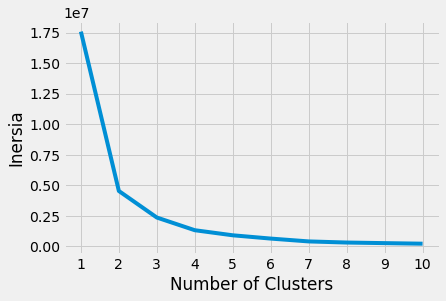

In [118]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inersia")
plt.show()

## K Means Clustering

Fitting the model

In [120]:
model = KMeans(3)
model.fit(Wine)

KMeans(n_clusters=3)

In [121]:
df2=Wine
df2['cluster'] = model.fit_predict(Wine)

In [122]:
df2.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Nonflavanoid_Phenols', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline', 'cluster'],
      dtype='object')

Plotting the scatter plot in order to identify how the clusters have been grouped

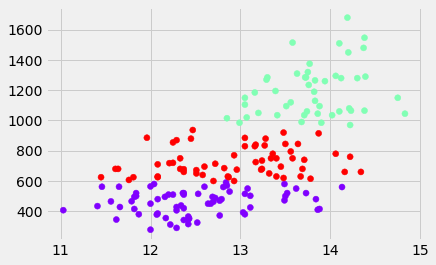

In [123]:
plt.scatter(df2['Alcohol'], df2['Proline'], 

            
            c=df2['cluster'], cmap='rainbow')


In [124]:
df2['cluster']

0      1
1      1
2      1
3      1
4      2
      ..
173    2
174    2
175    2
176    2
177    0
Name: cluster, Length: 178, dtype: int32

In [125]:
# Creating copy of the data to store labels from each algorithm
Wine = Wine.copy(deep = True)
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(Wine)
# Adding predicted labels to the original data and the scaled data 
df2['KMeans_Labels'] = kmeans.predict(Wine)
df2['KMeans_Labels'] = kmeans.predict(Wine)
df2['KMeans_Labels'].value_counts()

1    69
2    62
0    47
Name: KMeans_Labels, dtype: int64

In [126]:
df2['KMeans_Labels']

0      0
1      0
2      0
3      0
4      2
      ..
173    2
174    2
175    2
176    2
177    1
Name: KMeans_Labels, Length: 178, dtype: int32

In [127]:
b =df2.groupby(['Alcohol', 'KMeans_Labels'],as_index=False).count()

Plotting Scatterplots for each variable 

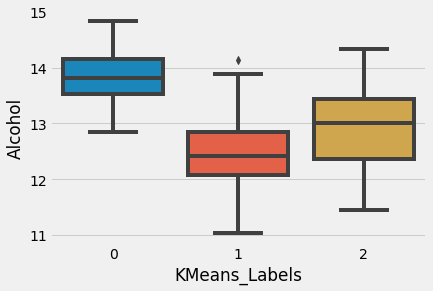

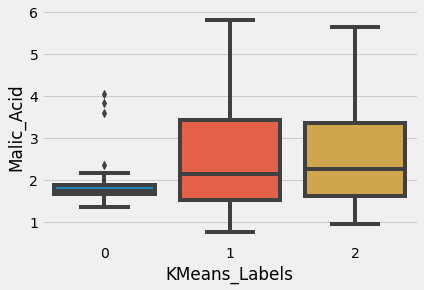

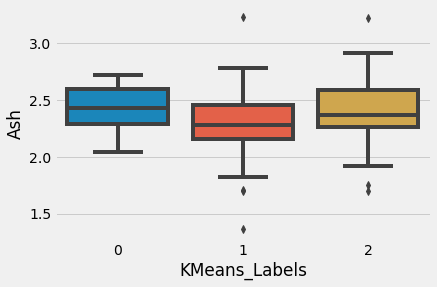

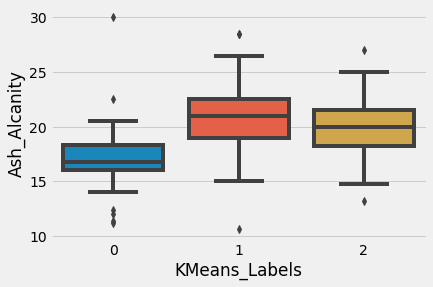

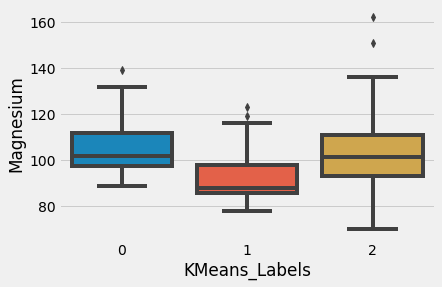

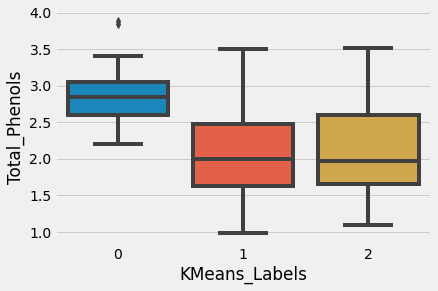

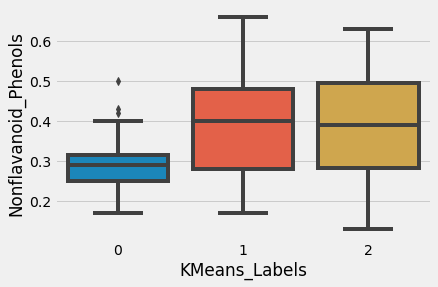

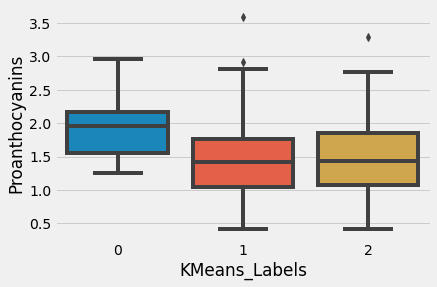

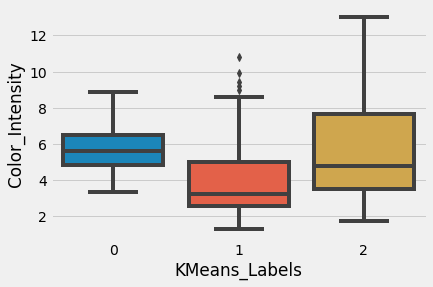

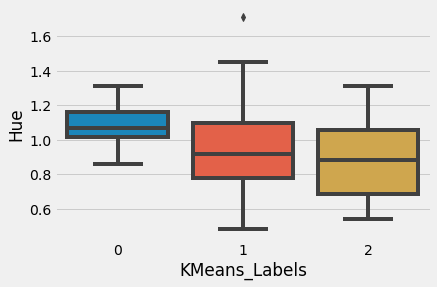

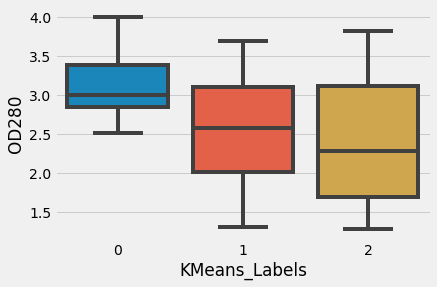

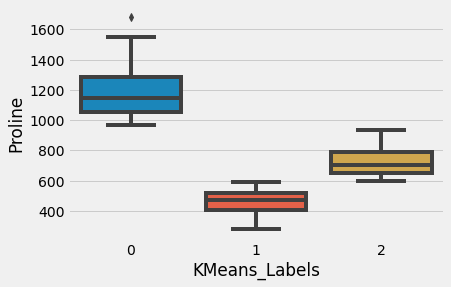

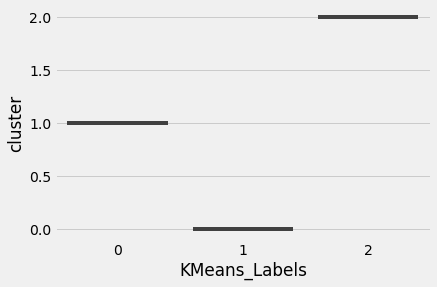

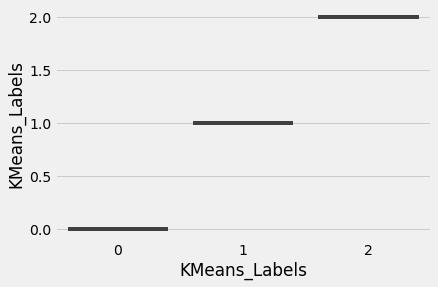

In [128]:
cols = df2.columns
for col in cols:
    sns.boxplot(x = 'KMeans_Labels', y = col, data =df2)
    plt.show()

In [129]:
import scipy.cluster.hierarchy as sch

In [130]:
Wine2 = df2.iloc[:,:].values

In [131]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
Wine2= std.fit_transform(Wine2)

## Hierachical Clustering

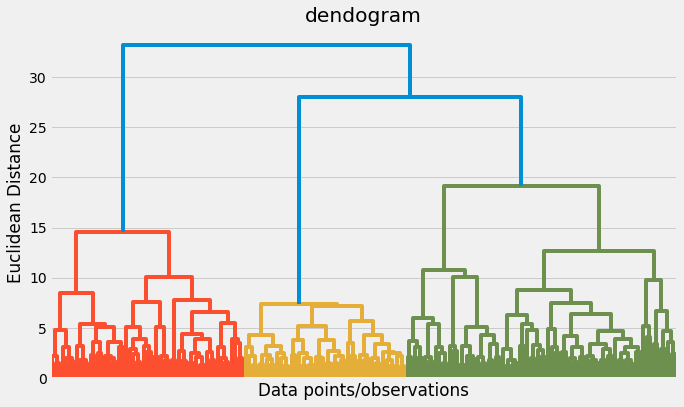

In [132]:
plt.figure(figsize=(10,6))
dendogram = sch.dendrogram(sch.linkage(Wine2,method ='ward'))
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.title('dendogram')
plt.xlabel('Data points/observations')
plt.ylabel('Euclidean Distance')
plt.show()

In [133]:
from sklearn.cluster import AgglomerativeClustering

In [134]:
#  Perform a clstering

hc = AgglomerativeClustering(3)
hc

AgglomerativeClustering(n_clusters=3)

In [135]:
pred = hc.fit_predict(df2)
pred

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

In [136]:
df2['Hierarchical_Cluster'] = pred
df2.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  OD280  \
0                  0.28             2.29             5.64  1.04   3.92   
1                  0.26             1.28             4.38  1.05   3.40   
2                  0.30             2.81             5.68  1.03   3.17   
3                  0.24             2.18             7.80  0.86   3.45   
4                  0.39             1.82             4.32  1.04   2.93   

   Proline  cluster  KMeans_Labels  Hierarchical_Cluster  
0     1065        1              0                     0  
1     1050        1              0                     0  
2     1185        1              0                     0  
3     1480        1              0                     0  
4      735        2              2                     2

## Classification

Importing Libraries and the dataset

In [137]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import sklearn
from sklearn import ensemble, tree, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics as sm
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

In [138]:
Drug= pd.read_csv('drug200.csv')

Understanding the data set

In [139]:
Drug.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY

In [140]:
Drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [141]:
Drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [142]:
Drug['Drug'].describe()

count       200
unique        5
top       DrugY
freq         91
Name: Drug, dtype: object

Exploratory Data Analysis

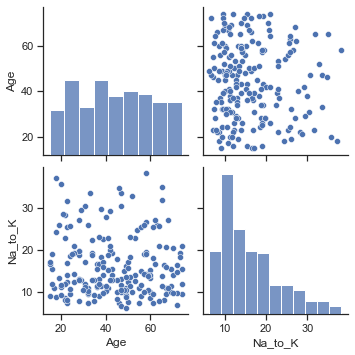

In [143]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Drug)
import matplotlib.pyplot as plt
plt.show()

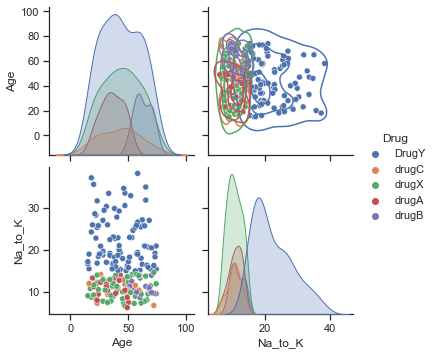

In [144]:
model = sns.pairplot(Drug, hue = 'Drug')
model.map_upper(sns.kdeplot, levels = 4, color = '.2')
plt.show()

In [145]:
import matplotlib.pyplot as plt  
from matplotlib import pyplot as plt

In [146]:
numerical_values = Drug[['Sex','Na_to_K']]

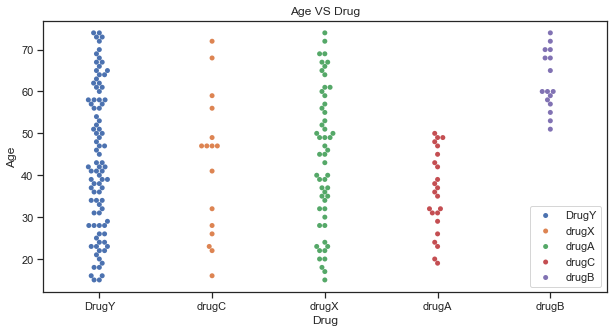

In [147]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = Drug)
plt.legend(Drug.Drug.value_counts().index)
plt.title("Age VS Drug")
plt.show()

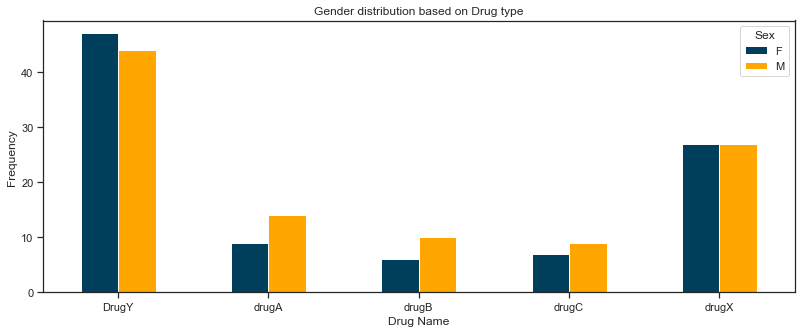

In [148]:
pd.crosstab(Drug.Drug,Drug.Sex).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Drug Name')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [149]:
import plotly.graph_objects as go
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

fig = go.Figure(data = [go.Pie(labels= ['DrugY', 'drugA','drugB','drugC','drugX'],values=Drug['Drug'].value_counts().values)])

fig.update_traces(hoverinfo = 'label + percent', textinfo = 'value', textfont_size = 20,
                 marker = dict(colors = colors, line = dict( color = '#000000', width = 2)))

fig.show()


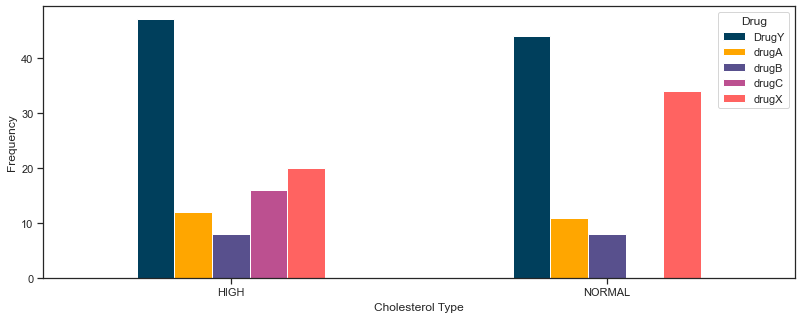

In [150]:
pd.crosstab(Drug.Cholesterol,Drug.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.xlabel('Cholesterol Type')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [151]:
Drug["Age"].min()


15

In [152]:
Drug["Age"].min()

15

'Drug type VS Age< 15'

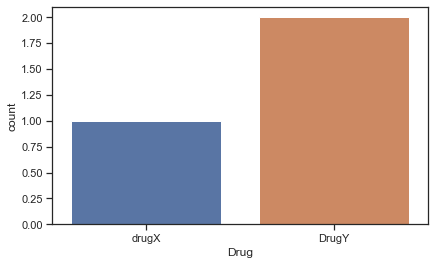

In [153]:
sns.countplot(x ='Drug', data = Drug[(Drug['Age']<= 15)])
plt.title
("Drug type VS Age< 15")

'Drug type VS Age< 30'

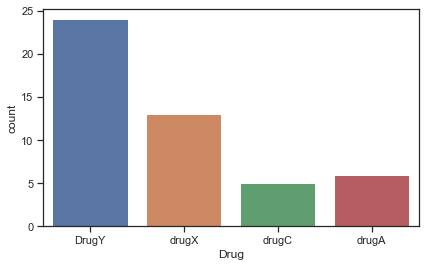

In [154]:
sns.countplot(x ='Drug', data = Drug[(Drug['Age']<= 30)])
plt.title
("Drug type VS Age< 30")

'Drug type VS Age< 45'

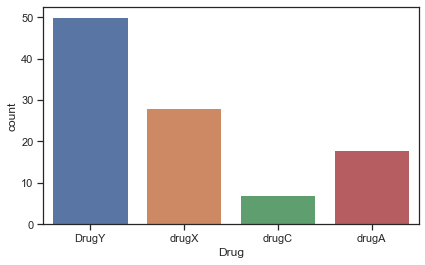

In [155]:
sns.countplot(x ='Drug', data = Drug[(Drug['Age']<= 45)])
plt.title
("Drug type VS Age< 45")

'Drug type VS Age< 60'

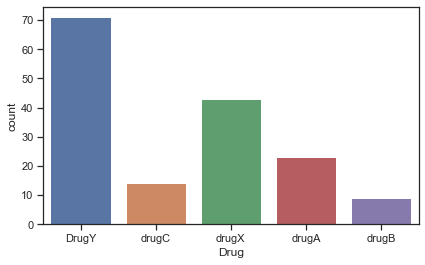

In [156]:
sns.countplot(x ='Drug', data = Drug[(Drug['Age']<= 60)])
plt.title
("Drug type VS Age< 60")

'Drug type VS Age< 75'

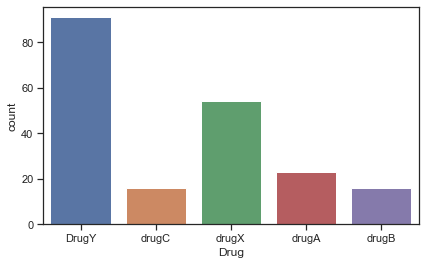

In [157]:
sns.countplot(x ='Drug', data = Drug[(Drug['Age']<= 75)])
plt.title
("Drug type VS Age< 75")

C:\Users\haysh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\haysh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



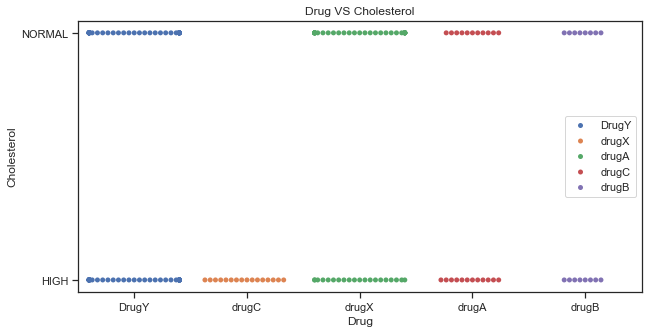

In [158]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Cholesterol",data = Drug)
plt.legend(Drug.Drug.value_counts().index)
plt.title("Drug VS Cholesterol")
plt.show()

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

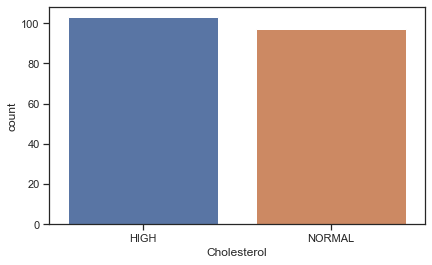

In [159]:
sns.countplot(x ='Cholesterol', data = Drug)

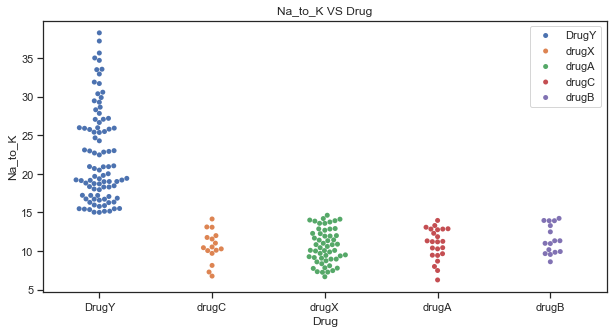

In [160]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = Drug)
plt.legend(Drug.Drug.value_counts().index)
plt.title("Na_to_K VS Drug")
plt.show()

Plotting the correlation matrix

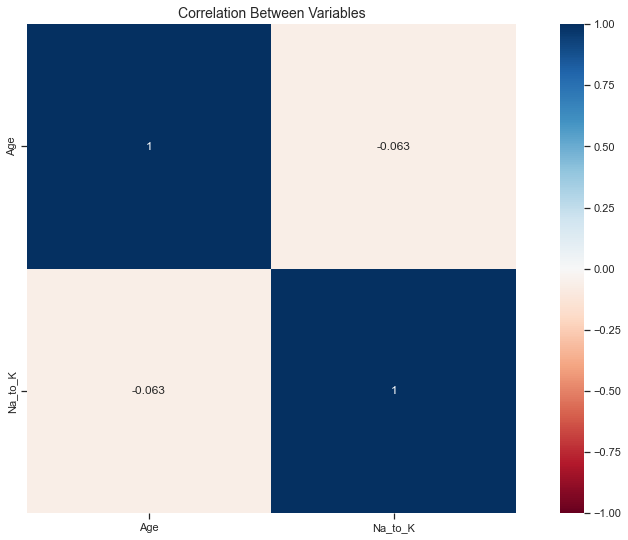

In [161]:
correlation_metrics= Drug.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

Encoding Categorical Variables

In [162]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    Drug[y] = le.fit_transform(Drug[y])

In [163]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in label_list:
    label_encoder(l)

Defining the independent variables and the dependent variable

In [164]:
X = Drug.iloc[:,:-1,]
y = Drug.iloc[:,-1]

In [165]:
X

Age  Sex  BP  Cholesterol  Na_to_K
0     23    0   0            0      167
1     47    1   1            0       89
2     47    1   1            0       43
3     28    0   2            0       10
4     61    0   1            0      133
..   ...  ...  ..          ...      ...
195   56    0   1            0       69
196   16    1   1            0       75
197   52    1   2            0       36
198   23    1   2            1      102
199   40    0   1            1       66

[200 rows x 5 columns]

Splitting the dataset into train set and test set

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [167]:
X_train

Age  Sex  BP  Cholesterol  Na_to_K
165   38    1   1            0      134
148   61    0   1            1        6
95    36    1   1            1       67
188   65    1   0            1      194
32    49    1   1            1       58
..   ...  ...  ..          ...      ...
81    64    1   2            0        9
91    41    1   0            1      110
80    60    1   0            0       97
191   23    1   0            0       12
153   72    0   1            1      107

[140 rows x 5 columns]

In [168]:
X_train.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
dtype: int64

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## K nearest neighbors

Fitting the model 

In [170]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=10)
knn.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(X_test,y_test))

Train Score: 0.7928571428571429
Test Score: 0.8666666666666667


In [171]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

In [172]:
result_dict_train["KNN Default Train Score"] = np.mean(accuracies)
result_dict_test["KNN Default Test Score"] = knn.score(X_test,y_test)

In [173]:
y_pred1 = knn.predict(X_test)
y_pred1

array([0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 3, 0, 0, 2, 4, 4, 4, 0, 4, 0, 3, 1,
       4, 0, 1, 4, 0, 2, 4, 4, 4, 0, 0, 0, 0, 1, 1, 2, 3, 0, 0, 1, 4, 4,
       0, 0, 4, 0, 2, 0, 4, 4, 0, 0, 1, 0, 4, 0, 0, 0])

Classification Report

In [174]:
from sklearn.metrics import classification_report

report1 = classification_report(y_test, y_pred1)
print(report1)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       1.00      0.67      0.80         9
           2       0.67      0.80      0.73         5
           3       0.67      1.00      0.80         2
           4       0.80      0.92      0.86        13

    accuracy                           0.87        60
   macro avg       0.81      0.86      0.82        60
weighted avg       0.88      0.87      0.87        60



In [175]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred1))

[[28  0  1  0  2]
 [ 2  6  1  0  0]
 [ 0  0  4  0  1]
 [ 0  0  0  2  0]
 [ 0  0  0  1 12]]


## Random Forrest

In [176]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,y_test))

Train Score: 0.9928571428571429
Test Score: 1.0


In [177]:
result_dict_train["Random Forest Default Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Default Test Score"] = rfc.score(X_test,y_test)

In [178]:
y_pred2 = rfc.predict(X_test)
y_pred2

array([1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 3, 0, 0, 2, 4, 4, 4, 0, 4, 0, 3, 1,
       4, 0, 1, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 1, 1, 2, 4, 0, 0, 1, 4, 4,
       0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 4, 1, 0, 0])

In [179]:
#Classification Report
from sklearn.metrics import classification_report

report2 = classification_report(y_test, y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        13

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [180]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred2))

[[31  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0 13]]


## Decision Tree Classifier

In [181]:
dtree_reg = DecisionTreeRegressor(random_state=0)
dtree_reg.fit(X_train, y_train)
accuracies = cross_val_score(dtree_reg, X_train, y_train, cv=5)
dtree_reg.fit(X_train,y_train)
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtree_reg.score(X_test,y_test))

Train Score: 0.9975210270030989
Test Score: 0.9423754135097642


In [182]:
result_dict_train["Decision Tree Default Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Default Test Score"] = rfc.score(X_test,y_test)

In [183]:
y_pred3 = dtree_reg.predict(X_test)
y_pred3

array([1., 0., 0., 2., 0., 0., 0., 2., 0., 3., 3., 0., 0., 2., 4., 4., 4.,
       0., 4., 0., 3., 1., 4., 0., 1., 4., 0., 0., 4., 4., 4., 0., 0., 0.,
       0., 1., 1., 2., 4., 0., 0., 1., 4., 4., 0., 0., 2., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 4., 1., 0., 0.])

In [184]:
#Classification Report
report3 = classification_report(y_test, y_pred3)
print(report3)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00        13

    accuracy                           0.98        60
   macro avg       0.93      0.99      0.96        60
weighted avg       0.99      0.98      0.98        60



In [185]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred3))

[[30  0  0  1  0]
 [ 0  9  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0 13]]


## XG Booster Classifier

In [186]:
xgb = XGBClassifier(n_estimators=100)

In [187]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [188]:
accuracies = cross_val_score(dtree_reg, X_train, y_train, cv=5)
dtree_reg.fit(X_train,y_train)
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtree_reg.score(X_test,y_test))

Train Score: 0.9975210270030989
Test Score: 0.9423754135097642


In [189]:
result_dict_train["XG BOOST Default Train Score"] = np.mean(accuracies)
result_dict_test["XG BOOST Default Test Score"] = rfc.score(X_test,y_test)

In [190]:
y_pred4 = xgb.predict(X_test)
y_pred4

array([1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 4, 0, 0, 2, 4, 4, 4, 0, 4, 0, 3, 1,
       4, 0, 1, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 1, 1, 2, 4, 0, 0, 1, 4, 4,
       0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 4, 1, 0, 0], dtype=int64)

In [191]:
#Classification Report
report4= classification_report(y_test, y_pred4)
print(report4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      0.50      0.67         2
           4       0.93      1.00      0.96        13

    accuracy                           0.98        60
   macro avg       0.99      0.90      0.93        60
weighted avg       0.98      0.98      0.98        60



In [193]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred4))

[[31  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  1  1]
 [ 0  0  0  0 13]]


Comparing the outputs of different models used

In [194]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train

Score
KNN Default Train Score            0.792857
Random Forest Default Train Score  0.992857
Decision Tree Default Train Score  0.997521
XG BOOST Default Train Score       0.997521

In [195]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

Score
KNN Default Test Score            0.866667
Random Forest Default Test Score  1.000000
Decision Tree Default Test Score  1.000000
XG BOOST Default Test Score       1.000000

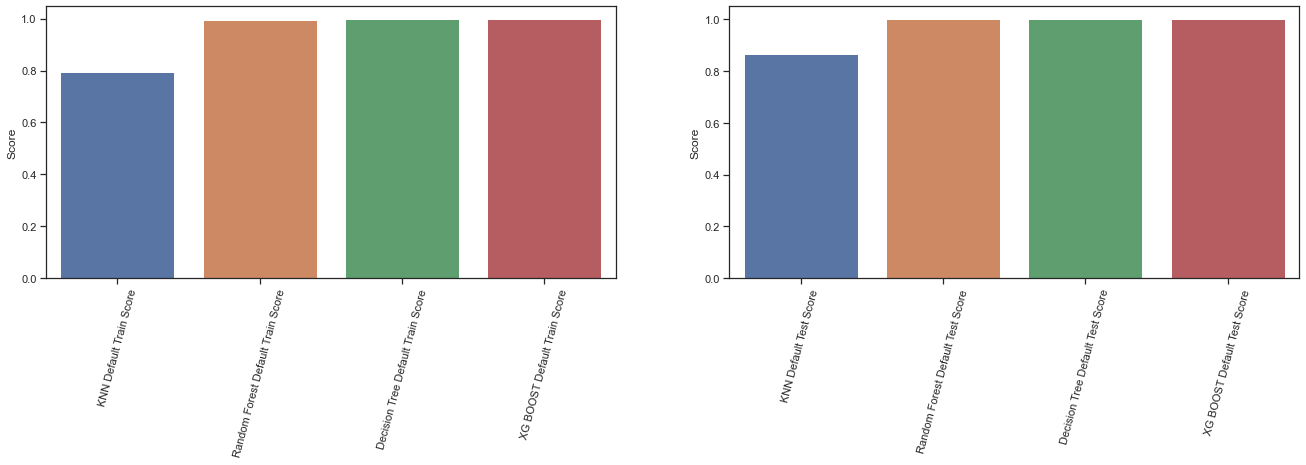

In [196]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()